# Imports

In [1]:
from tqdm import tqdm
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os

import numpy as np
from math import sqrt
from numpy import arange

# Constants

In [2]:
PATH_TRAIN = "/content/drive/MyDrive/EDA/EDA_dataset/train.csv"
PATH_VALID = "/content/drive/MyDrive/EDA/EDA_dataset/validation.csv"

PATH_PLOTS = "/content/drive/MyDrive/EDA/Plots"
os.makedirs(PATH_PLOTS, exist_ok=True)

# Read data

In [3]:
data_train = pd.read_csv(PATH_TRAIN)
data_valid = pd.read_csv(PATH_VALID)

# Separate features (X) and target variable (y)
y_train = data_train['Pret']
X_train = data_train.copy() #drop('Pret', axis=1)

y_valid = data_valid['Pret']
X_valid = data_valid.copy() #.drop('Pret', axis=1)

In [4]:
X = pd.concat([X_train, X_valid])
y = pd.concat([y_train, y_valid])

In [6]:
X.head(5)

,Pret,Versiune,Vechime,Km,Putere,Capacitate cilindrica,Marca,Model,Combustibil,Transmisie,Norma de poluare,Cutie de viteze,Tip Caroserie,Optiuni culoare,Tara de origine,Stare
0,29790,D4 AWD Inscription,6.0,124000,190,1969,Volvo,XC 60,Diesel,4x4 (automat),Euro 6,Automata,SUV,Metalizata,Italia,Second hand
1,12495,109 CDI Extralung Mixt,5.0,36000,90,1461,Mercedes-Benz,Citan,Diesel,Fata,Euro 6,Manuala,Monovolum,Metalizata,Romania,Second hand
2,8699,1.6 BlueHDi FAP STT Active,8.0,219000,120,1560,Peugeot,308,Diesel,Fata,Euro 6,Manuala,Combi,Metalizata,Olanda,Second hand
3,37849,2.2 CRDi 2WD Signature,4.0,51500,202,2151,Hyundai,Santa Fe,Diesel,Fata,Euro 6,Automata,SUV,Metalizata,Franta,Second hand
4,6390,1.8 TSI FR,11.0,228300,160,1798,Seat,Leon,Benzina,Fata,Euro 5,Manuala,Compacta,Metalizata,Germania,Second hand


In [7]:
X_train.shape

(7244, 16)

In [8]:
X_valid.shape

(1812, 16)

In [9]:
X.shape

(9056, 16)

In [10]:
X_train.isna().sum()

Pret                      0
Versiune                  0
Vechime                  15
Km                        0
Putere                    0
Capacitate cilindrica     0
Marca                     0
Model                     0
Combustibil               0
Transmisie                0
Norma de poluare          0
Cutie de viteze           0
Tip Caroserie             0
Optiuni culoare           0
Tara de origine           0
Stare                     0
dtype: int64

In [11]:
 X_train.dropna(subset=['Vechime'], inplace=True)

In [12]:
X_train.shape

(7229, 16)

In [13]:
X_train.isna().sum()

Pret                     0
Versiune                 0
Vechime                  0
Km                       0
Putere                   0
Capacitate cilindrica    0
Marca                    0
Model                    0
Combustibil              0
Transmisie               0
Norma de poluare         0
Cutie de viteze          0
Tip Caroserie            0
Optiuni culoare          0
Tara de origine          0
Stare                    0
dtype: int64

In [14]:
X_valid.isna().sum()

Pret                     0
Versiune                 0
Vechime                  3
Km                       0
Putere                   0
Capacitate cilindrica    0
Marca                    0
Model                    0
Combustibil              0
Transmisie               0
Norma de poluare         0
Cutie de viteze          0
Tip Caroserie            0
Optiuni culoare          0
Tara de origine          0
Stare                    0
dtype: int64

In [15]:
 X_valid.dropna(subset=['Vechime'], inplace=True)

In [16]:
X_valid.shape

(1809, 16)

In [17]:
X_valid.isna().sum()

Pret                     0
Versiune                 0
Vechime                  0
Km                       0
Putere                   0
Capacitate cilindrica    0
Marca                    0
Model                    0
Combustibil              0
Transmisie               0
Norma de poluare         0
Cutie de viteze          0
Tip Caroserie            0
Optiuni culoare          0
Tara de origine          0
Stare                    0
dtype: int64

# Features

In [68]:
numeric_features = ["Km", "Vechime", "Capacitate cilindrica", "Putere"]
categorical_features = ["Marca", "Model", "Versiune", "Combustibil", "Transmisie", "Norma de poluare", "Tip Caroserie", "Cutie de viteze", "Stare", "Tara de origine", "Optiuni culoare"]

#### Distribution of numerical features

<ipython-input-23-5f1933387bae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Km'], label='Train')
<ipython-input-23-5f1933387bae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_valid['Km'], label='Validation')


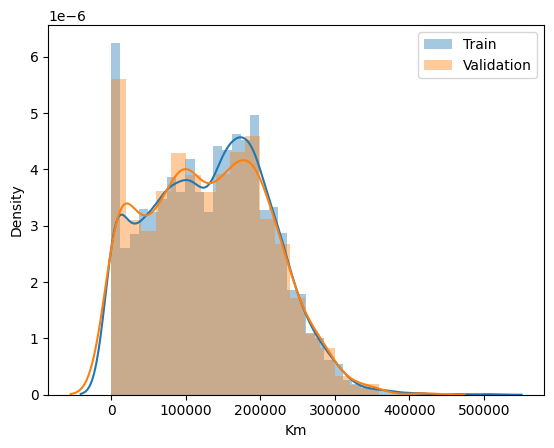

In [23]:
plt.figure()
sns.distplot(X_train['Km'], label='Train')
sns.distplot(X_valid['Km'], label='Validation')
plt.legend(title='Dataset', title_fontsize='14', fontsize='12', loc='upper right')
plt.xlabel('Km')
plt.ylabel('Density')
plt_save_name = 'km_eda_plot';
plt.legend()
plt.savefig(os.path.join(PATH_PLOTS, plt_save_name))

<ipython-input-22-64c0df8a93cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Vechime'], label='Train')
<ipython-input-22-64c0df8a93cc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_valid['Vechime'], label='Validation')


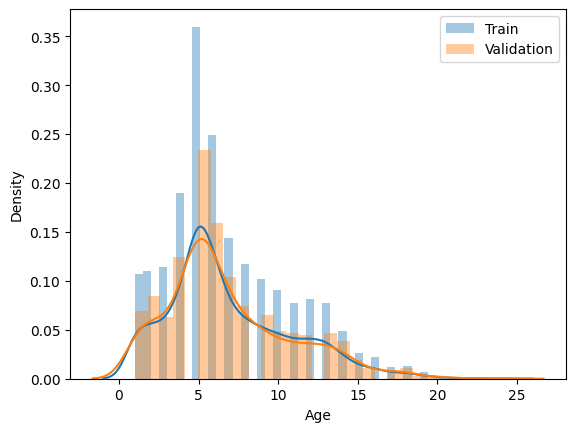

In [22]:
plt.figure()
sns.distplot(X_train['Vechime'], label='Train')
sns.distplot(X_valid['Vechime'], label='Validation')
plt.legend(title='Dataset', title_fontsize='14', fontsize='12', loc='upper right')
plt.xlabel('Age')
plt.ylabel('Density')
plt_save_name = 'age_eda_plot';
plt.legend()
plt.savefig(os.path.join(PATH_PLOTS, plt_save_name))

<ipython-input-25-52f42a8ac588>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Capacitate cilindrica'], label='Train')
<ipython-input-25-52f42a8ac588>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_valid['Capacitate cilindrica'], label='Validation')


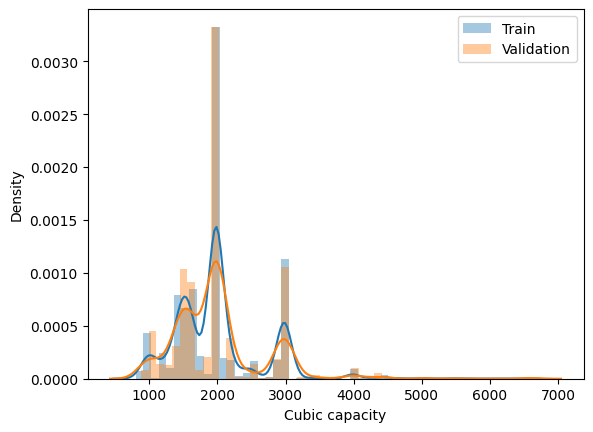

In [25]:
plt.figure()
sns.distplot(X_train['Capacitate cilindrica'], label='Train')
sns.distplot(X_valid['Capacitate cilindrica'], label='Validation')
plt.legend(title='Dataset', title_fontsize='14', fontsize='12', loc='upper right')
plt.xlabel('Cubic capacity')
plt.ylabel('Density')
plt_save_name = 'cubic_capacity_eda_plot';
plt.legend()
plt.savefig(os.path.join(PATH_PLOTS, plt_save_name))

<ipython-input-24-50b36c2e3685>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Putere'], label='Train')
<ipython-input-24-50b36c2e3685>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_valid['Putere'], label='Validation')


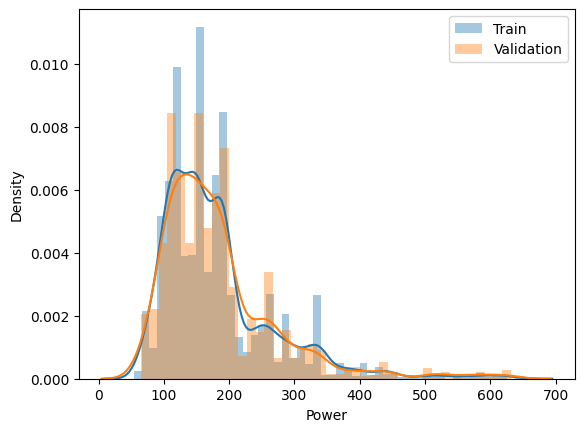

In [24]:
plt.figure()
sns.distplot(X_train['Putere'], label='Train')
sns.distplot(X_valid['Putere'], label='Validation')
plt.legend(title='Dataset', title_fontsize='14', fontsize='12', loc='upper right')
plt.xlabel('Power')
plt.ylabel('Density')
plt_save_name = 'power_eda_plot';
plt.legend()
plt.savefig(os.path.join(PATH_PLOTS, plt_save_name))

#### Distribution of categorical features

In [69]:
categorical_features

['Marca',
 'Model',
 'Versiune',
 'Combustibil',
 'Transmisie',
 'Norma de poluare',
 'Tip Caroserie',
 'Cutie de viteze',
 'Stare',
 'Tara de origine',
 'Optiuni culoare']

In [97]:
def plot_distribution_avg_price(col, title):
  keys = X[col].value_counts().keys()

  d_train = dict()
  d_valid = dict()

  d = dict()
  for x in keys:
    d[x] = X_train[X_train[col] == x]['Pret'].mean()

  d_train = dict(sorted(d.items(), key = lambda item:item[1], reverse=True))

  d = dict()
  for x in keys:
    d[x] = X_valid[X_valid[col] == x]['Pret'].mean()

  d_valid = dict(sorted(d.items(), key = lambda item:item[1], reverse=True))


  fig = plt.figure(figsize=(10,10))

  bar_width = 0.3

  train_bars = range(len(d_train))
  valid_bars = [x + bar_width for x in train_bars]

  plt.barh(train_bars, list(d_train.values()), bar_width, label='Train')
  plt.barh(valid_bars, list(d_valid.values()), bar_width, label='Validation')
  plt.xlabel('Average price')
  plt.ylabel(str(title))
  plt.title('Average price per ' + str(title))
  plt.yticks([x + bar_width / 2 for x in train_bars], list(d_train.keys()))
  plt.legend()
  plt.savefig(os.path.join(PATH_PLOTS, 'avg_price_' + str(col)))
  plt.show()

In [98]:
def plot_distribution_max_price(col, title):
  keys = X[col].value_counts().keys()

  d_train = dict()
  d_valid = dict()

  d = dict()
  for x in keys:
    d[x] = X_train[X_train[col] == x]['Pret'].max()

  d_train = dict(sorted(d.items(), key = lambda item:item[1], reverse=True))

  d = dict()
  for x in keys:
    d[x] = X_valid[X_valid[col] == x]['Pret'].max()

  d_valid = dict(sorted(d.items(), key = lambda item:item[1], reverse=True))


  fig = plt.figure(figsize=(10,10))

  bar_width = 0.3

  train_bars = range(len(d_train))
  valid_bars = [x + bar_width for x in train_bars]

  plt.barh(train_bars, list(d_train.values()), bar_width, label='Train')
  plt.barh(valid_bars, list(d_valid.values()), bar_width, label='Validation')
  plt.xlabel('Maximum price')
  plt.ylabel(str(title))
  plt.title('Maximum price per ' + str(title))
  plt.yticks([x + bar_width / 2 for x in train_bars], list(d_train.keys()))
  plt.legend()
  plt.savefig(os.path.join(PATH_PLOTS, 'max_price_' + str(col)))
  plt.show()

#### Brand ('Marca')

<Axes: title={'center': 'Number of entries per Brand'}, ylabel='Brand'>

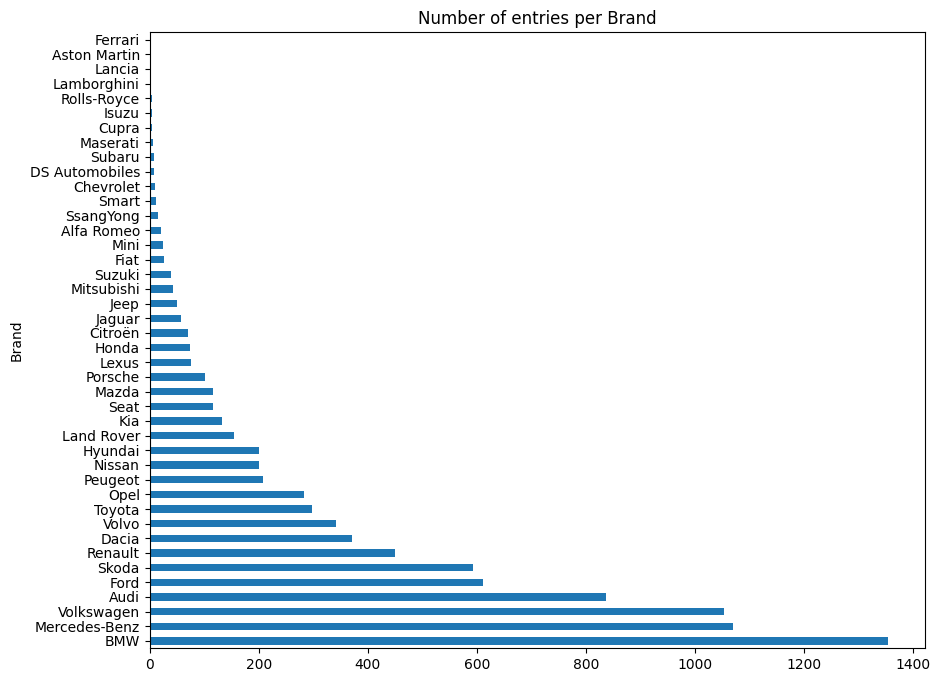

In [99]:
plt.figure(figsize=(10, 8))
plt.ylabel('Brand')
plt.title('Number of entries per Brand')
X['Marca'].value_counts().plot(kind='barh')

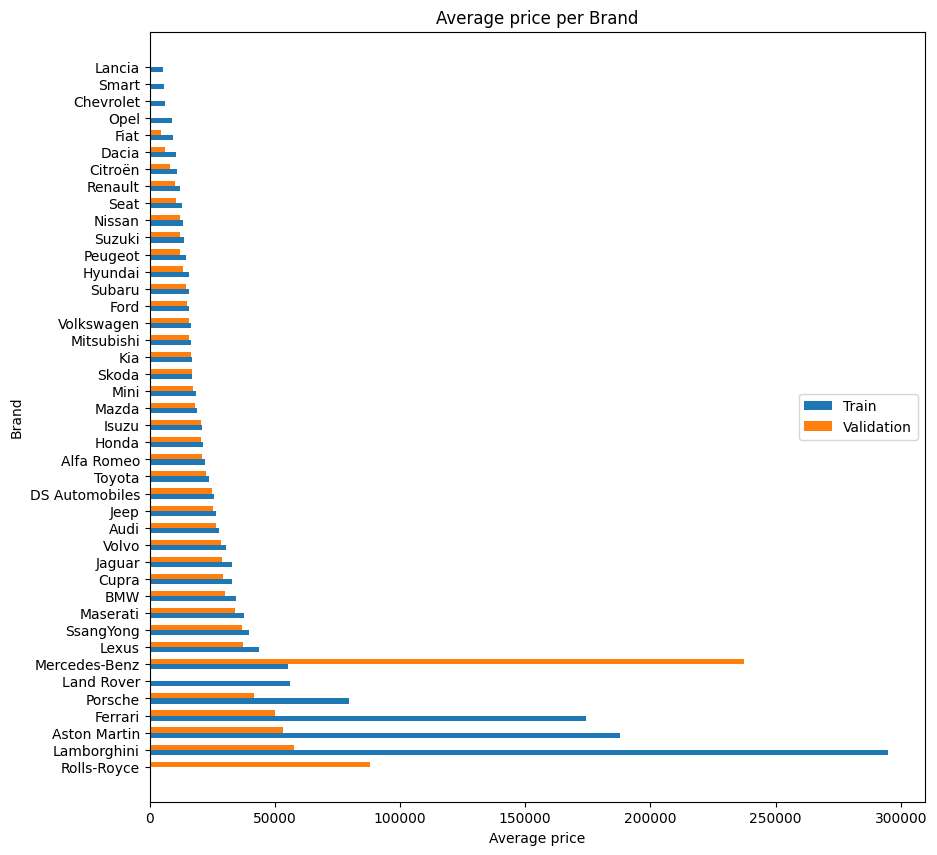

In [100]:
plot_distribution_avg_price('Marca', 'Brand')

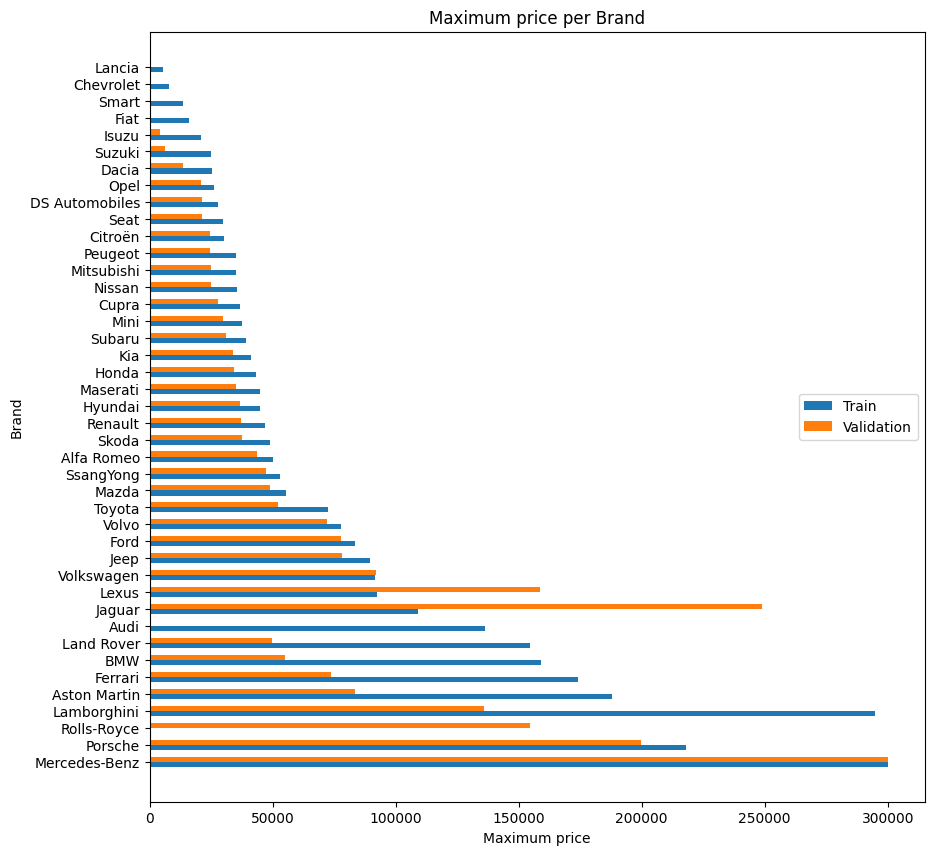

In [101]:
plot_distribution_max_price('Marca', 'Brand')

#### Fuel Type ('Combustibil')

<Axes: title={'center': 'Number of entries per Fuel Type'}, ylabel='Fuel Type'>

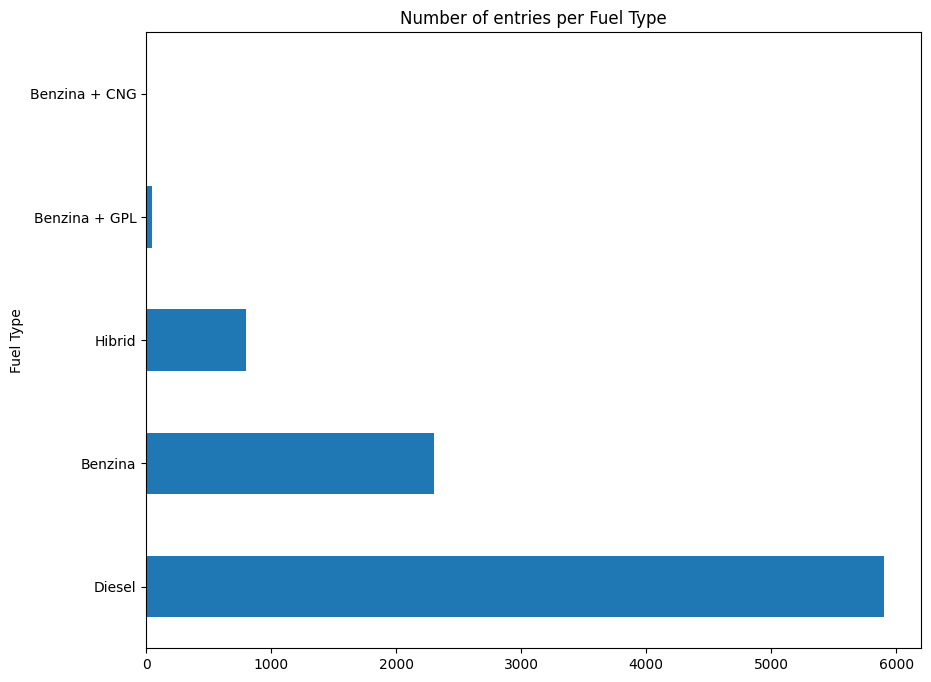

In [102]:
plt.figure(figsize=(10, 8))
plt.ylabel('Fuel Type')
plt.title('Number of entries per Fuel Type')
X['Combustibil'].value_counts().plot(kind='barh')

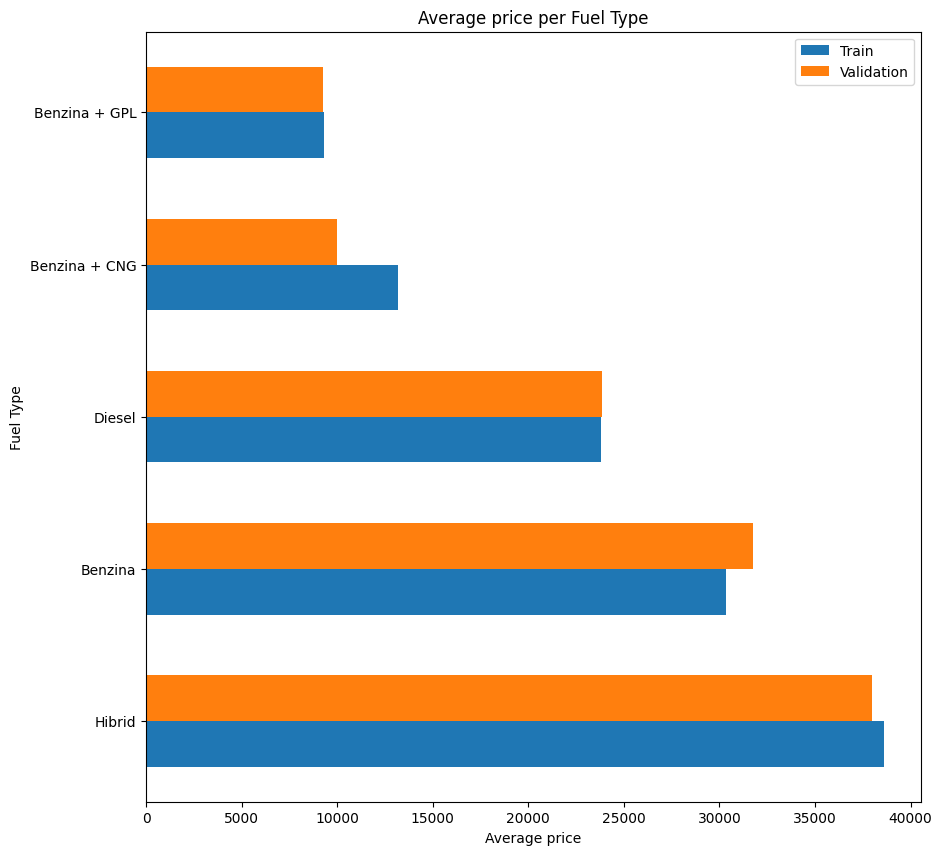

In [103]:
plot_distribution_avg_price('Combustibil', 'Fuel Type')

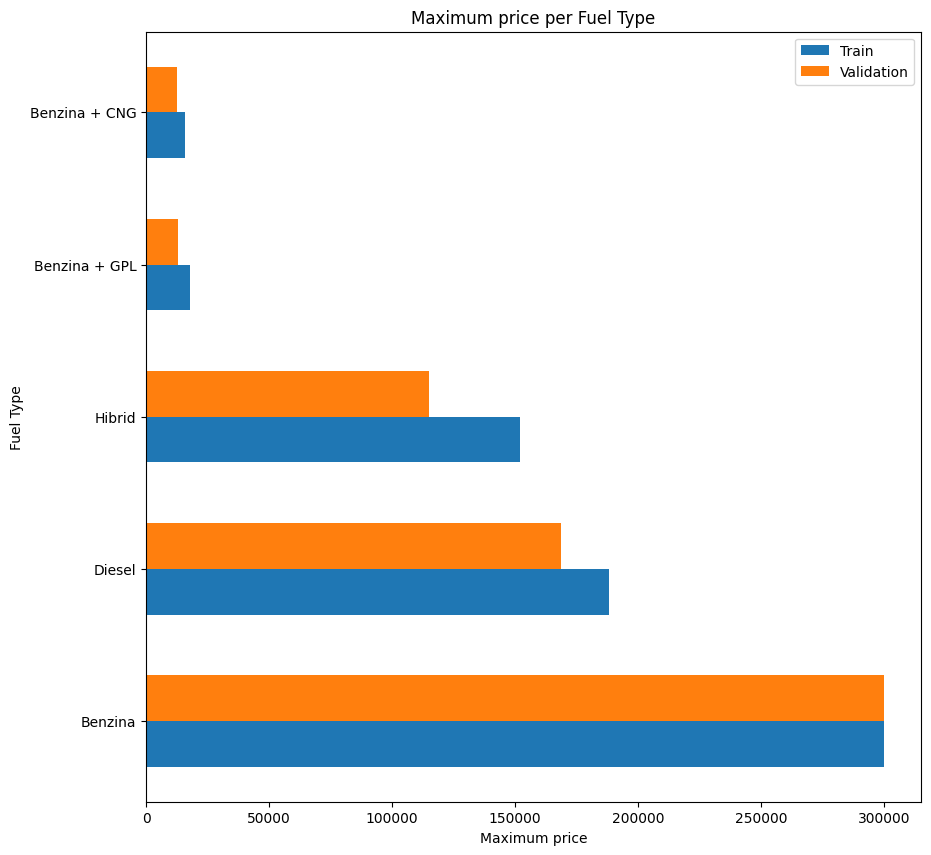

In [104]:
plot_distribution_max_price('Combustibil', 'Fuel Type')

 #### Transmission ('Transmisie')

<Axes: title={'center': 'Number of entries per Transmission'}, ylabel='Transmission'>

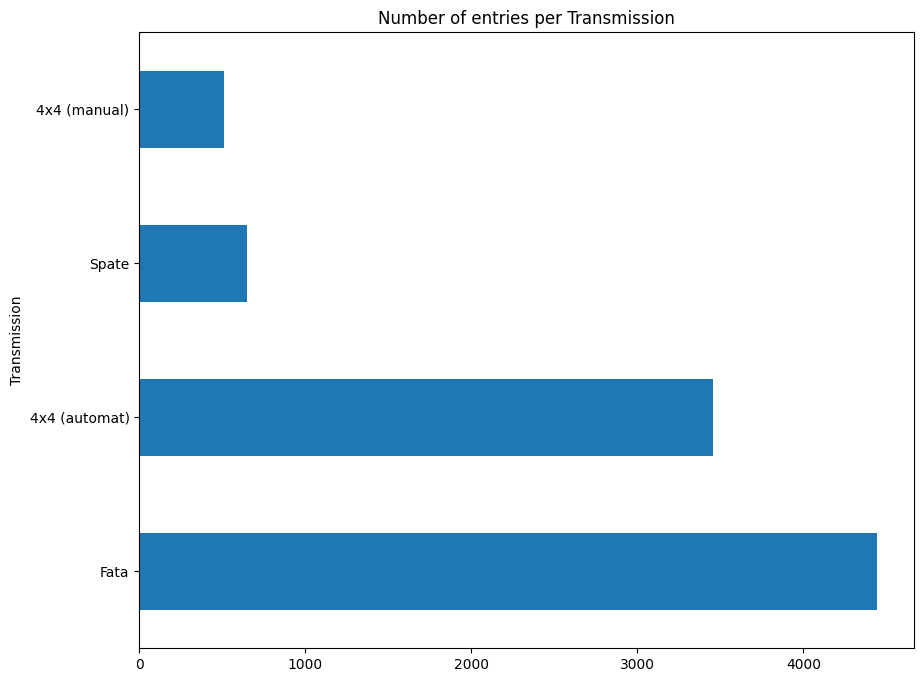

In [105]:
plt.figure(figsize=(10, 8))
plt.ylabel('Transmission')
plt.title('Number of entries per Transmission')
X['Transmisie'].value_counts().plot(kind='barh')

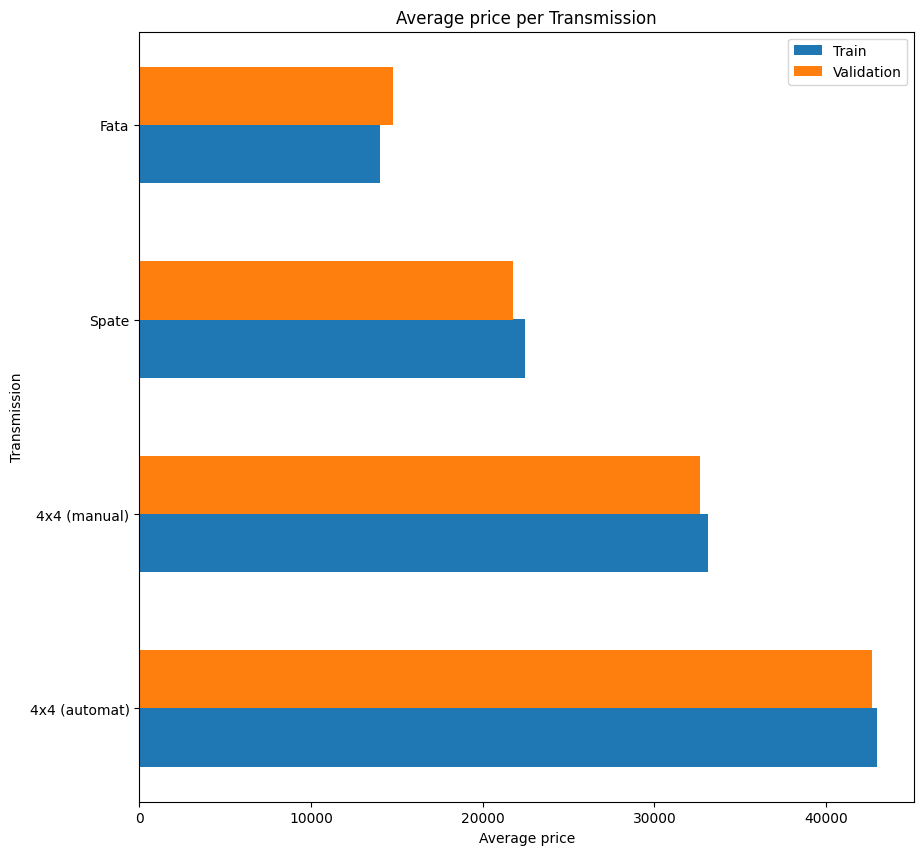

In [106]:
plot_distribution_avg_price('Transmisie', 'Transmission')

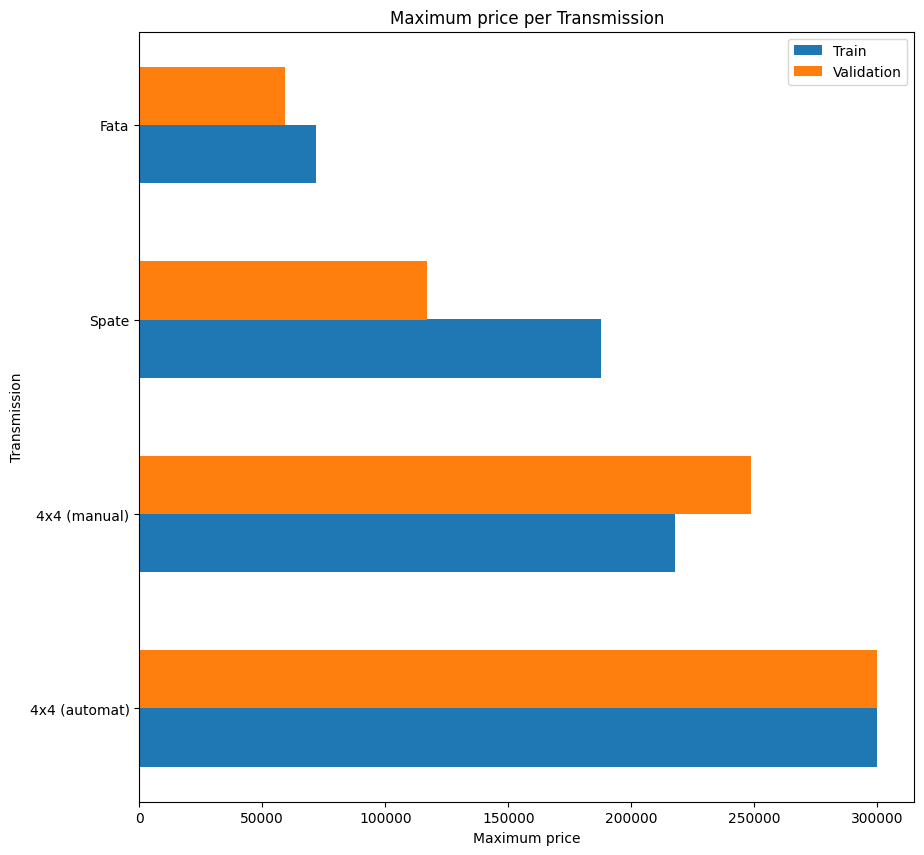

In [107]:
plot_distribution_max_price('Transmisie', 'Transmission')

#### Emission standard ('Norma de poluare')

<Axes: title={'center': 'Number of entries per Emission standard'}, ylabel='Emission standard'>

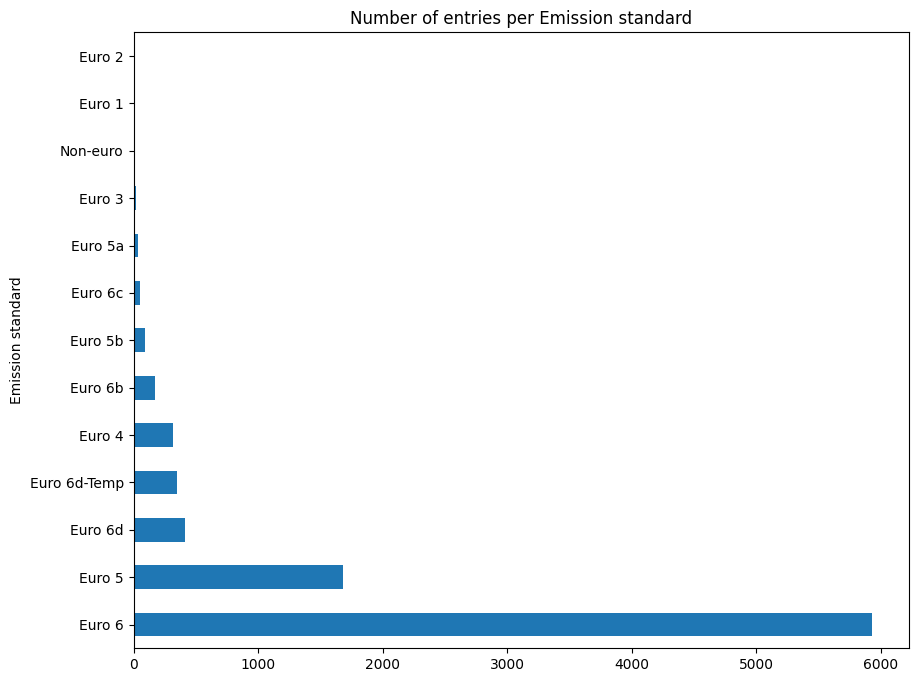

In [108]:
plt.figure(figsize=(10, 8))
plt.ylabel('Emission standard')
plt.title('Number of entries per Emission standard')
X['Norma de poluare'].value_counts().plot(kind='barh')

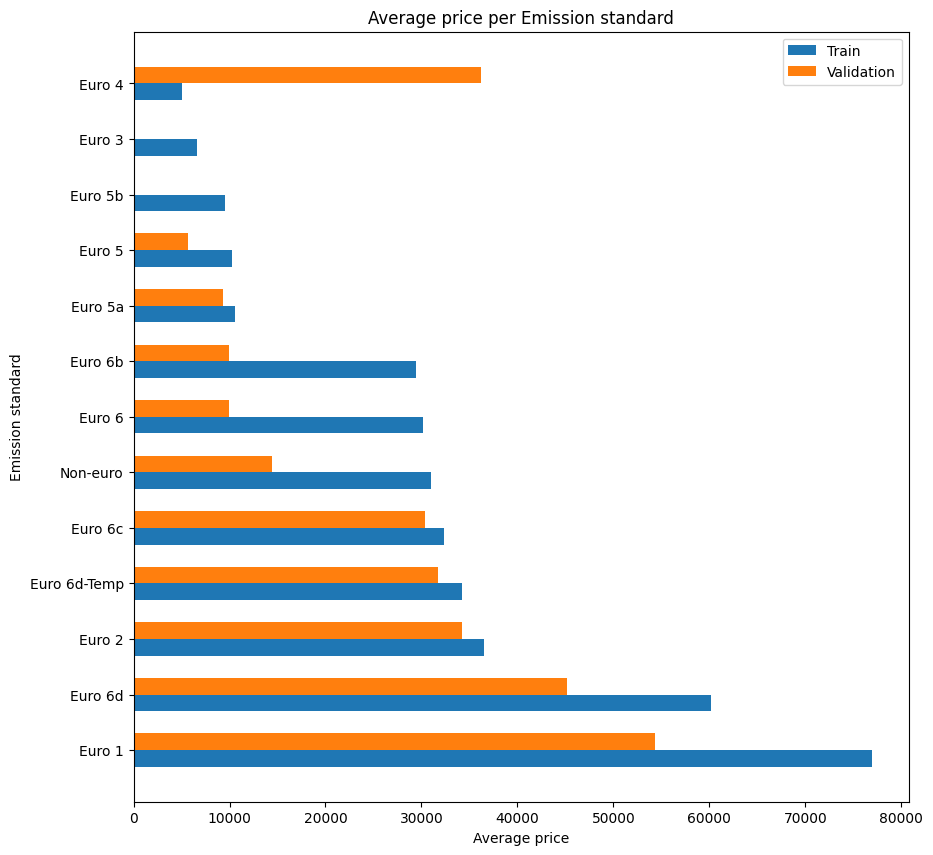

In [109]:
plot_distribution_avg_price('Norma de poluare', 'Emission standard')

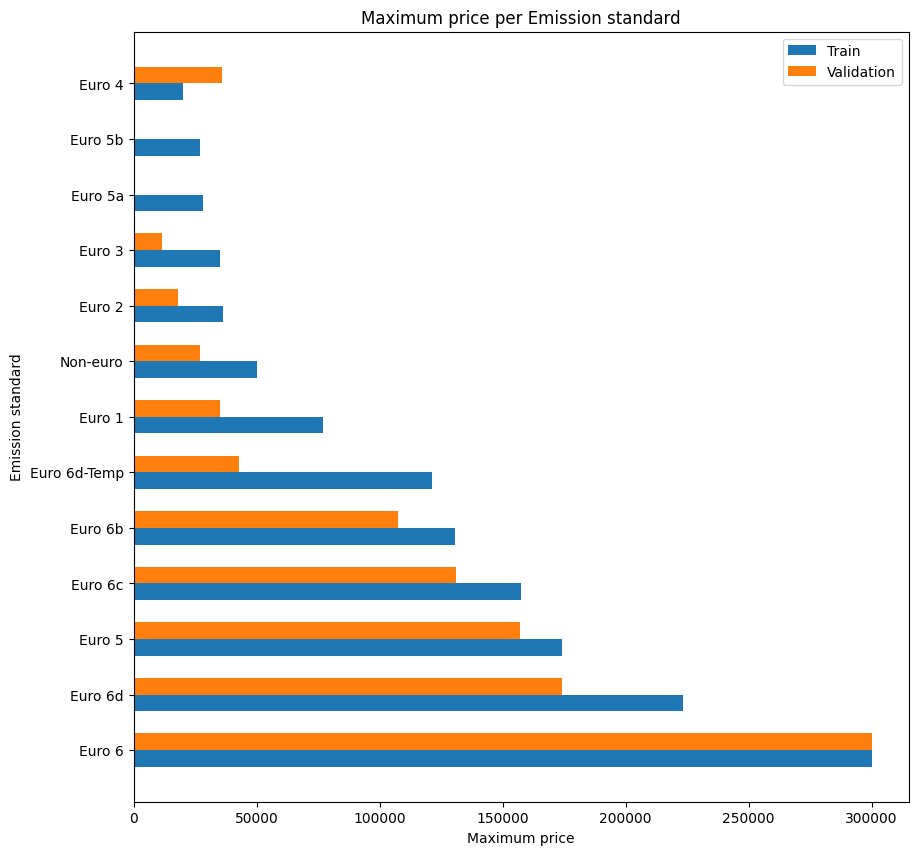

In [110]:
plot_distribution_max_price('Norma de poluare', 'Emission standard')

 #### Body Type ('Tip Caroserie')


<Axes: title={'center': 'Number of entries per Body Type'}, ylabel='Body Type'>

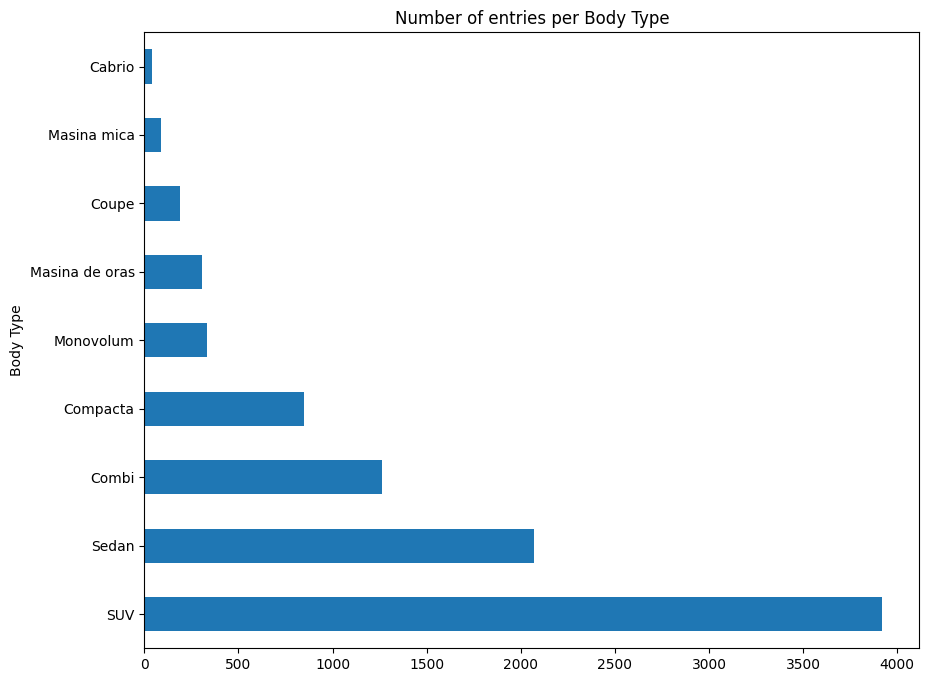

In [111]:
plt.figure(figsize=(10, 8))
plt.ylabel('Body Type')
plt.title('Number of entries per Body Type')
X['Tip Caroserie'].value_counts().plot(kind='barh')

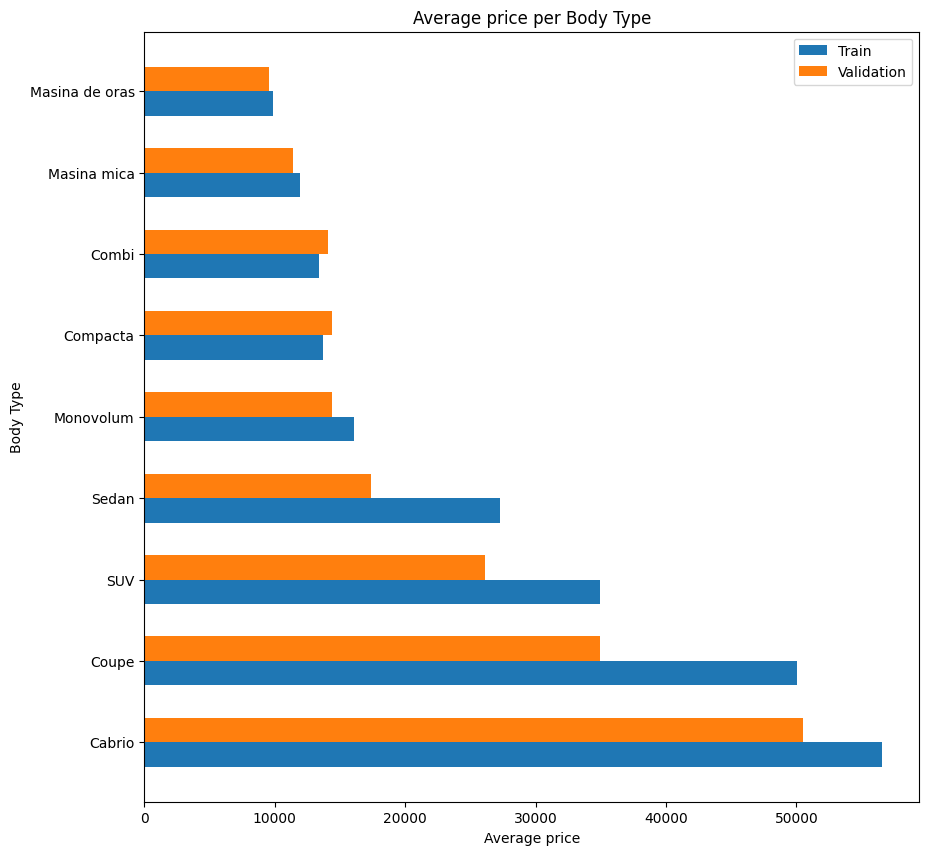

In [112]:
plot_distribution_avg_price('Tip Caroserie', 'Body Type')

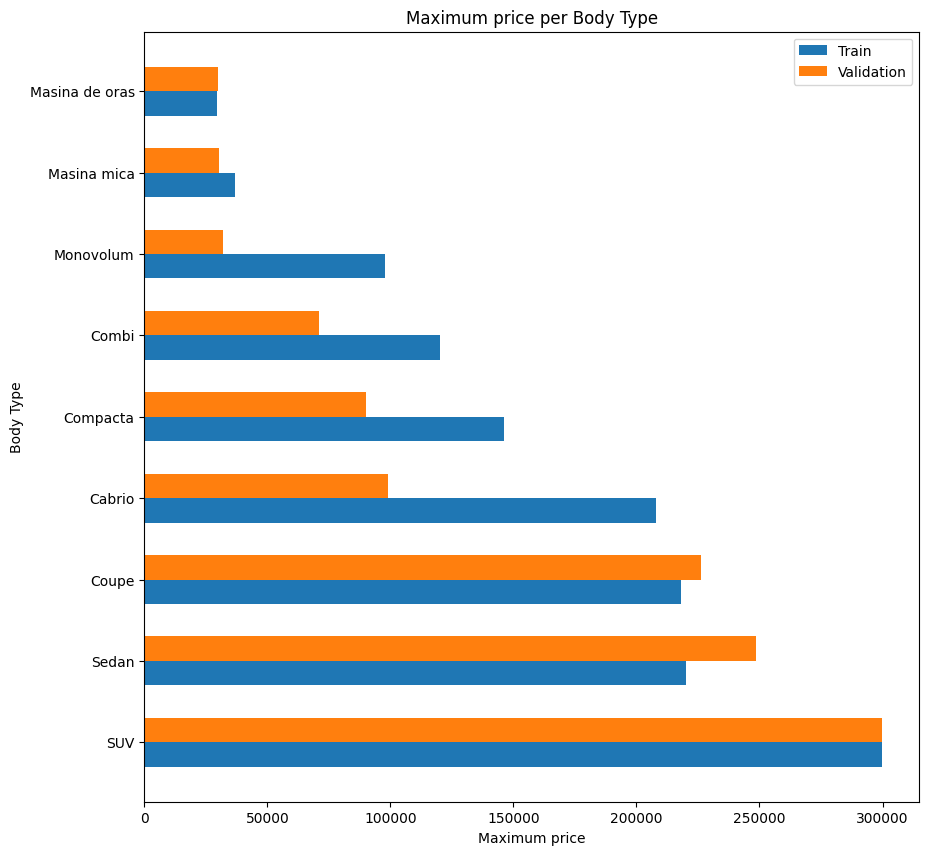

In [113]:
plot_distribution_max_price('Tip Caroserie', 'Body Type')

 ### Gearbox ('Cutie de viteze')

<Axes: title={'center': 'Number of entries per Gearbox'}, ylabel='Gearbox'>

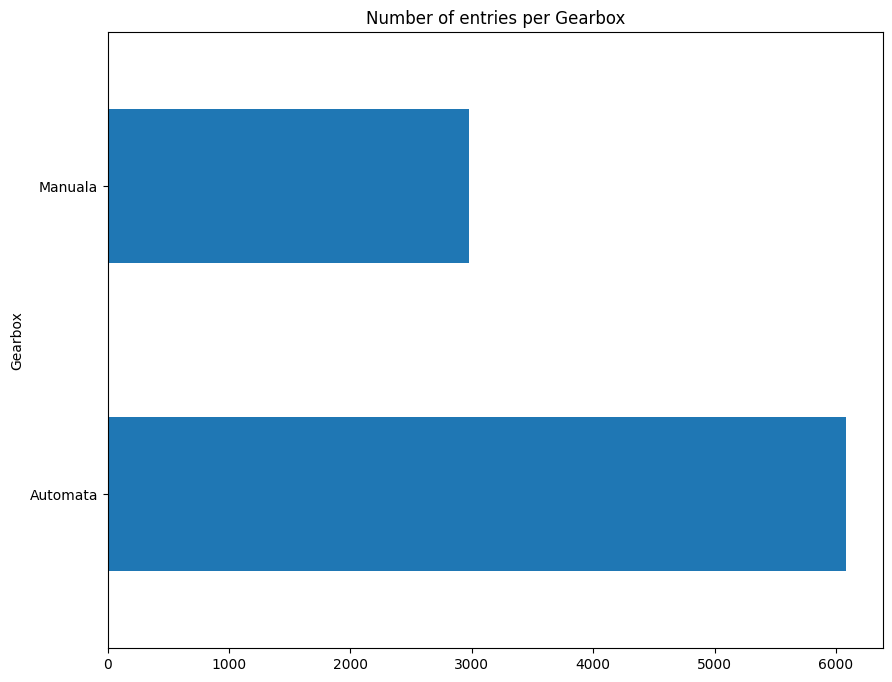

In [114]:
plt.figure(figsize=(10, 8))
plt.ylabel('Gearbox')
plt.title('Number of entries per Gearbox')
X['Cutie de viteze'].value_counts().plot(kind='barh')

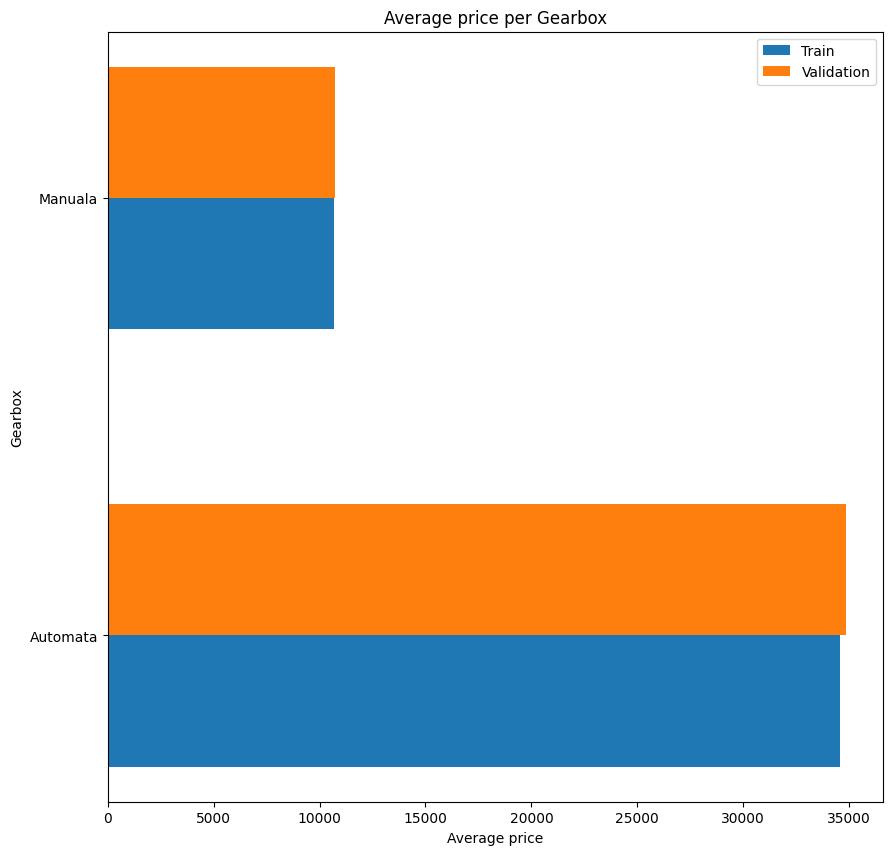

In [115]:
plot_distribution_avg_price('Cutie de viteze', 'Gearbox')

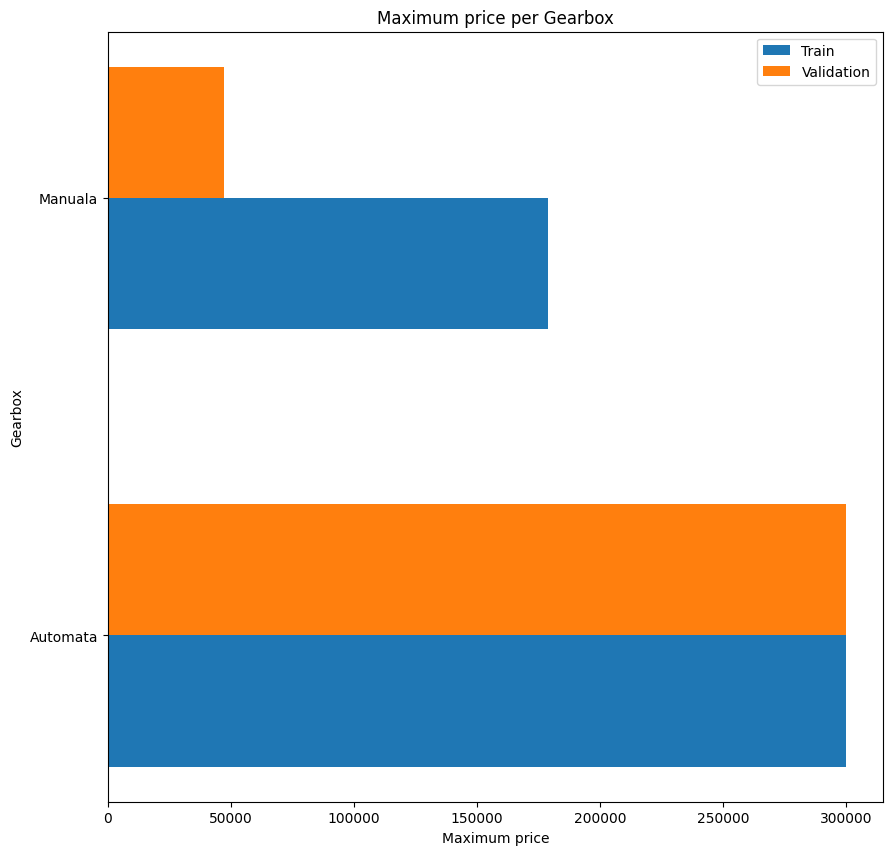

In [116]:
plot_distribution_max_price('Cutie de viteze', 'Gearbox')

#### Condition ('Stare')

<Axes: title={'center': 'Number of entries per Condition'}, ylabel='Condition'>

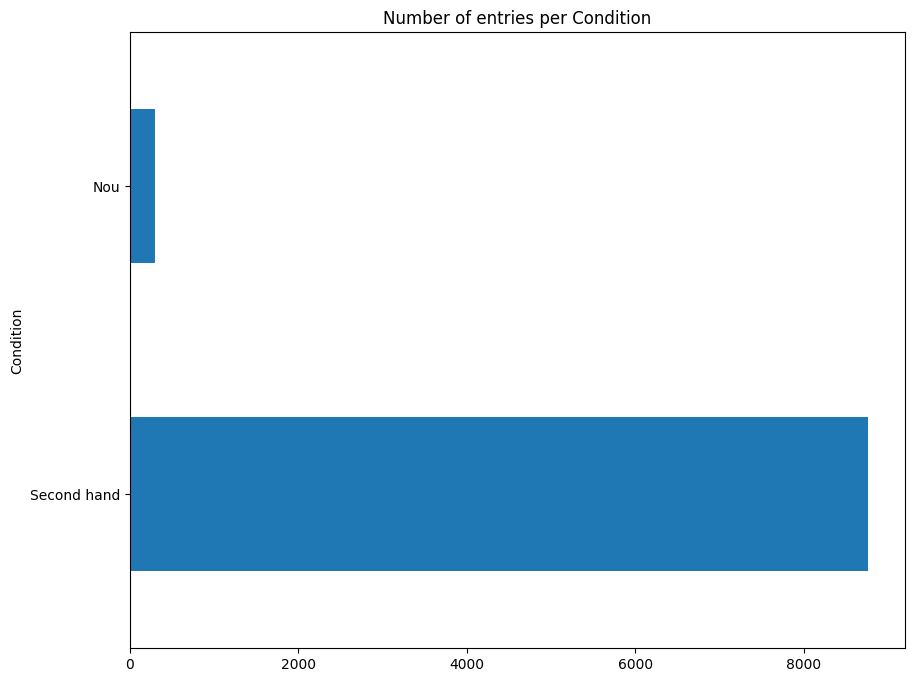

In [117]:
plt.figure(figsize=(10, 8))
plt.ylabel('Condition')
plt.title('Number of entries per Condition')
X['Stare'].value_counts().plot(kind='barh')

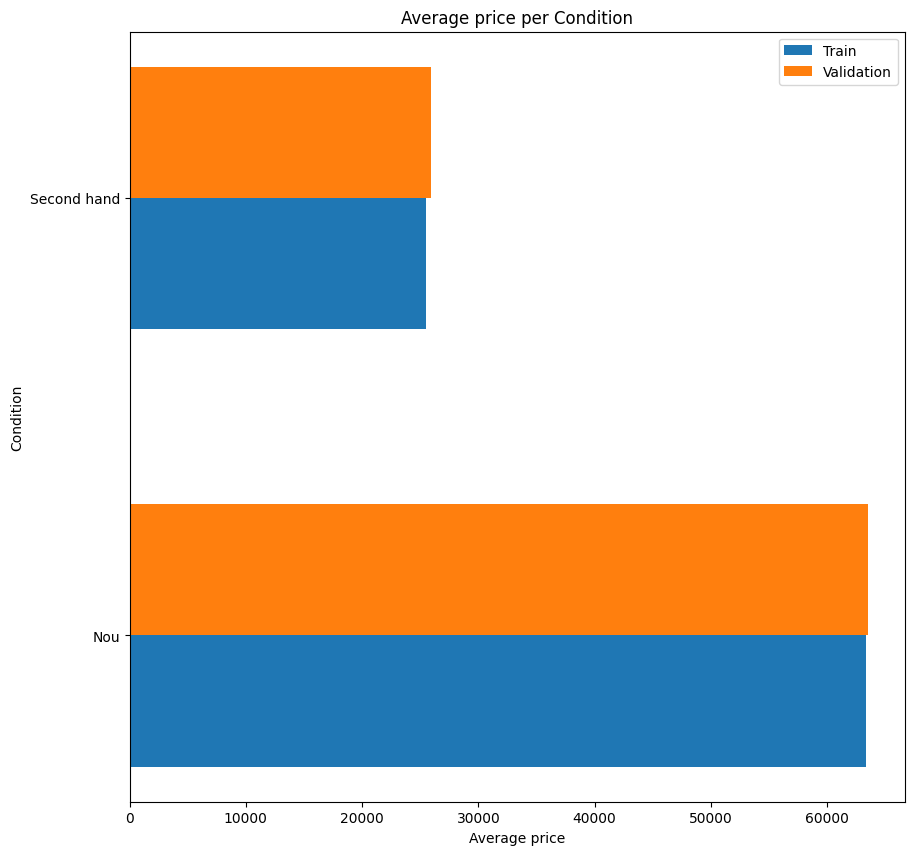

In [118]:
plot_distribution_avg_price('Stare', 'Condition')

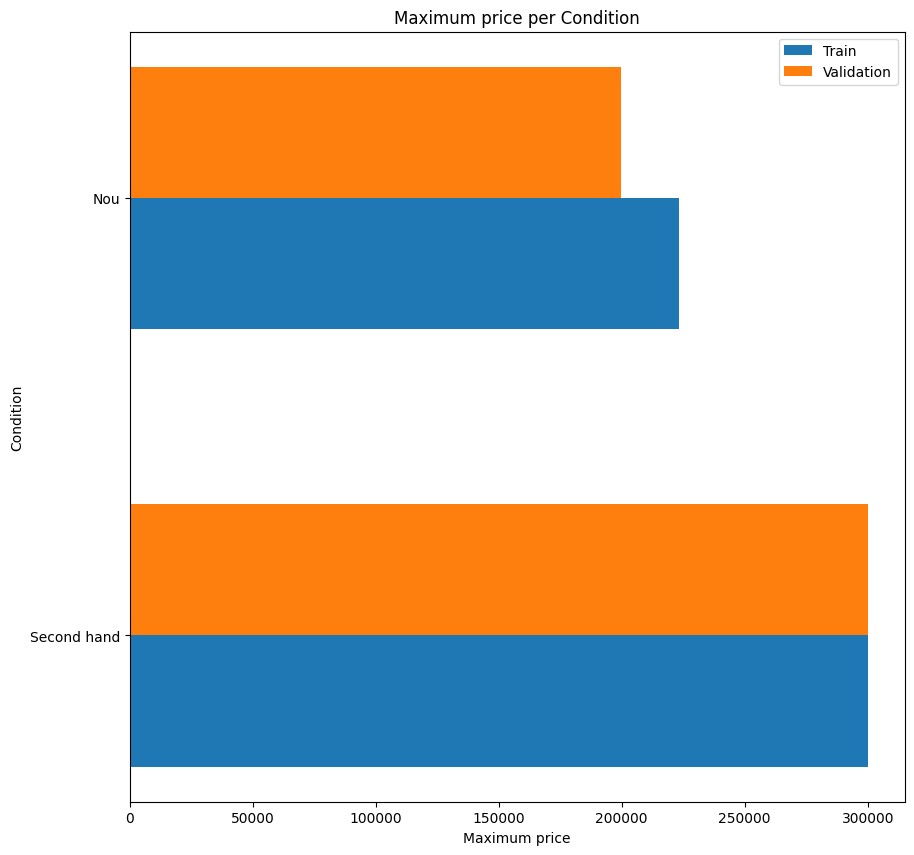

In [119]:
plot_distribution_max_price('Stare', 'Condition')

 #### Country of origin ('Tara de origine')

<Axes: title={'center': 'Number of entries per Country of origin'}, ylabel='Country of origin'>

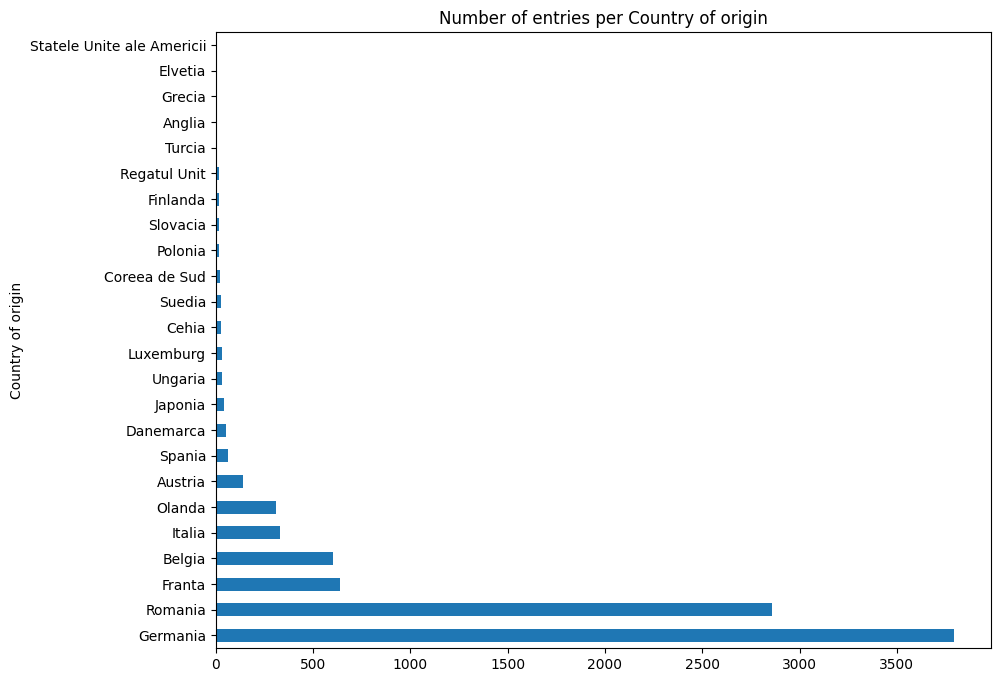

In [120]:
plt.figure(figsize=(10, 8))
plt.ylabel('Country of origin')
plt.title('Number of entries per Country of origin')
X['Tara de origine'].value_counts().plot(kind='barh')

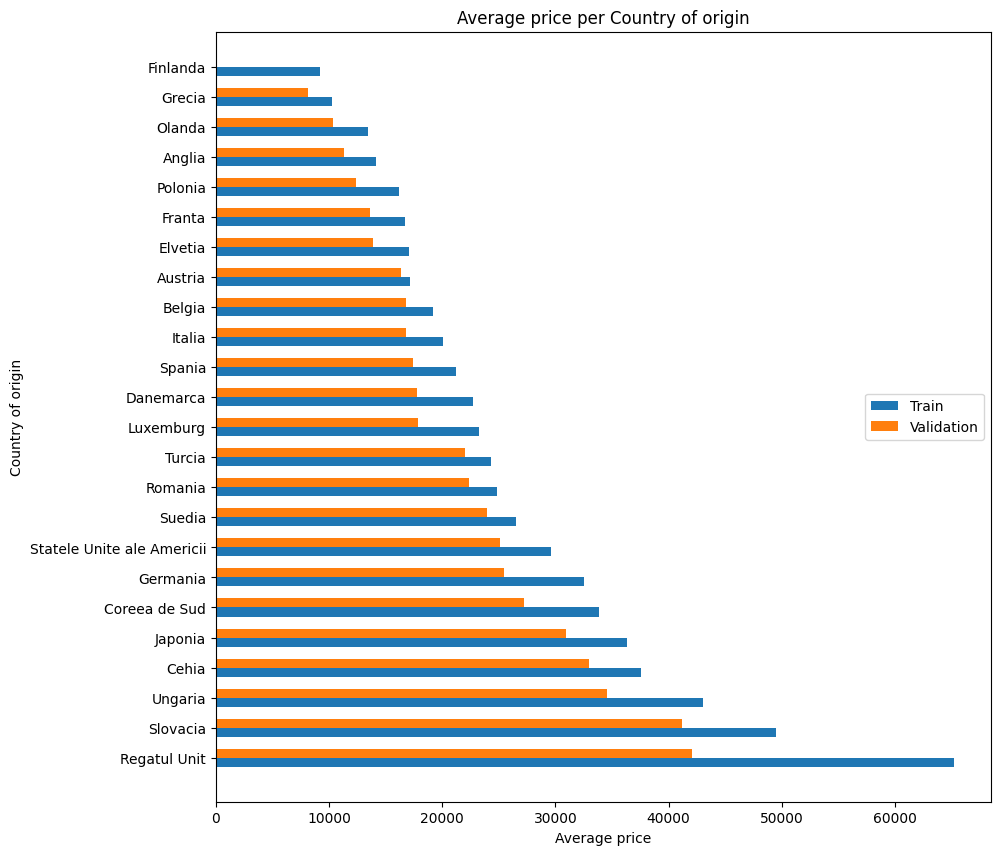

In [121]:
plot_distribution_avg_price('Tara de origine', 'Country of origin')

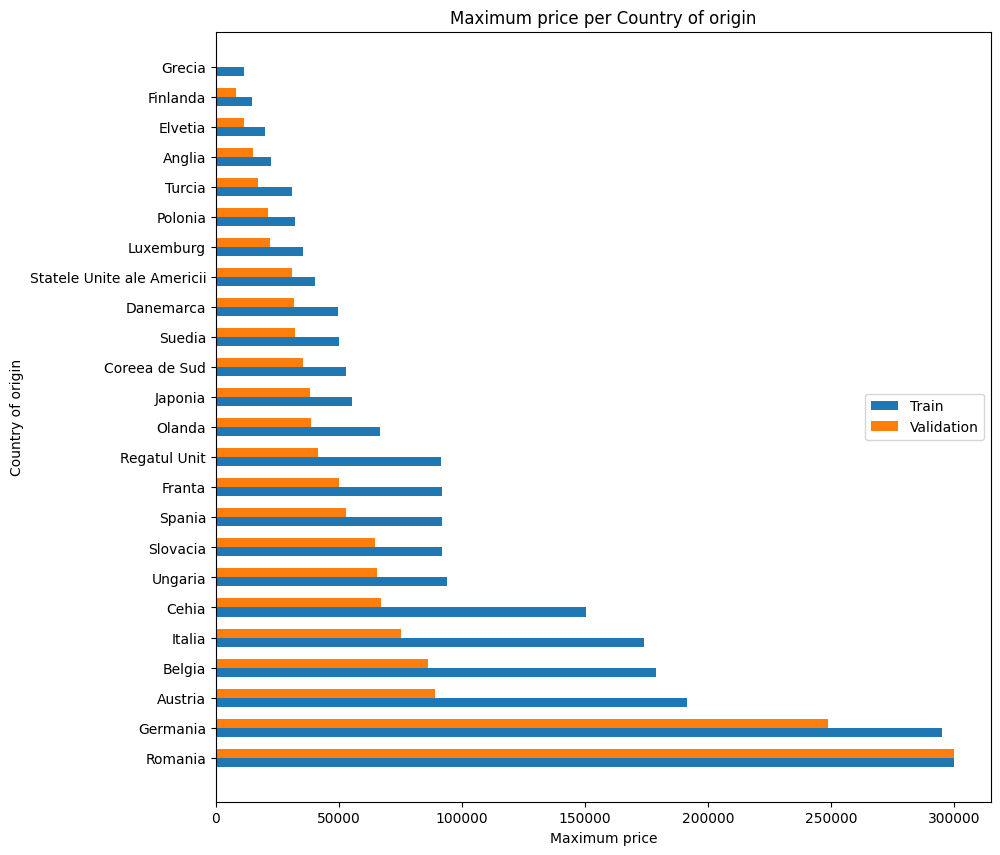

In [122]:
plot_distribution_max_price('Tara de origine', 'Country of origin')

 #### Color Options ('Optiuni culoare')

<Axes: title={'center': 'Number of entries per Color Options'}, ylabel='Color Options'>

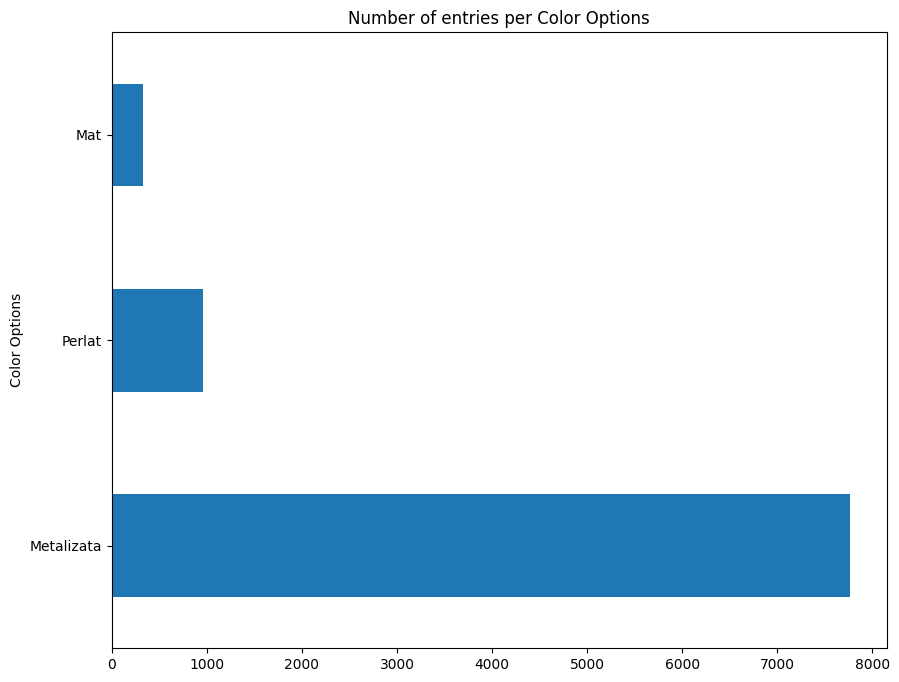

In [123]:
plt.figure(figsize=(10, 8))
plt.ylabel('Color Options')
plt.title('Number of entries per Color Options')
X['Optiuni culoare'].value_counts().plot(kind='barh')

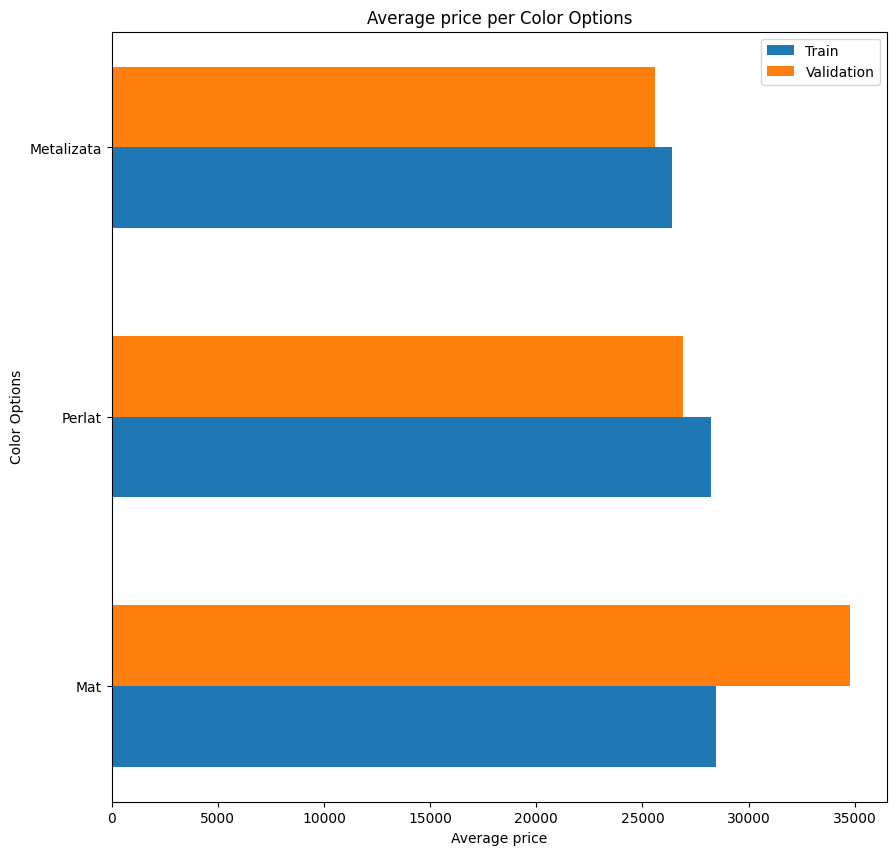

In [124]:
plot_distribution_avg_price('Optiuni culoare', 'Color Options')

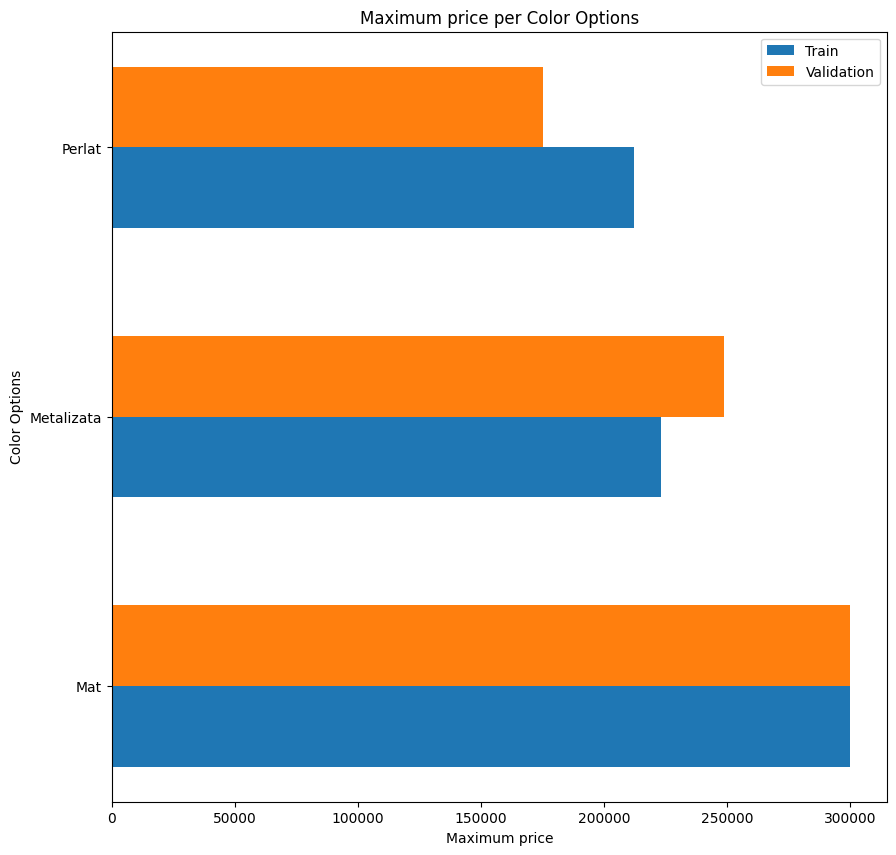

In [125]:
plot_distribution_max_price('Optiuni culoare', 'Color Options')